In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


### We can see that there are some duplicate values in this dataset but it is possible that same model of car was sold again. So, we will not take them as duplicates and keep them in our dataset.

In [8]:
df['brand']= df.name.str.split().str.get(0)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [9]:
df.drop('name',axis=1,inplace=True)

In [10]:
brand = df.brand.value_counts()
print(brand)

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64


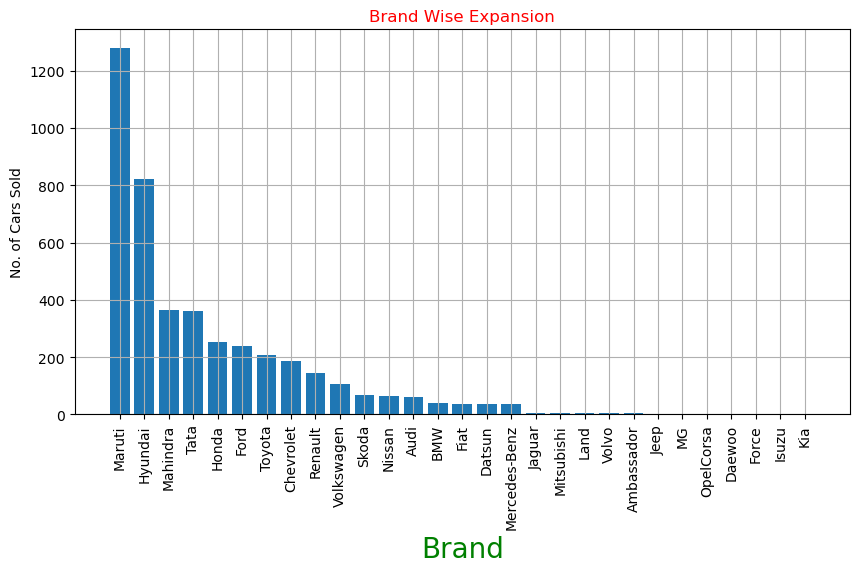

In [11]:
plt.figure(figsize=(10,5))
plt.bar(brand.index,brand.values)
plt.title("Brand Wise Expansion", color='red')
plt.xlabel("Brand",color='green',size=20)
plt.xticks(rotation = 90)
plt.ylabel("No. of Cars Sold")
plt.grid()
plt.show()

In [12]:
Counts= df.year.value_counts()
print(Counts)

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64


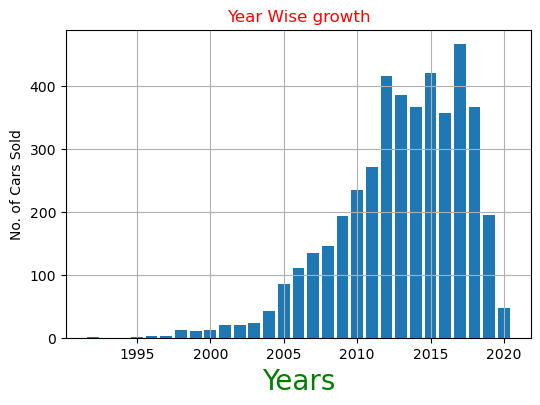

In [13]:
plt.figure(figsize=(6,4))
plt.bar(Counts.index,Counts.values)
plt.title("Year Wise growth", color='red')
plt.xlabel("Years",color='green',size=20)
plt.ylabel("No. of Cars Sold")
plt.grid()
plt.show()

### We can see that there is a sharp growth in car sales from year 2012. A sharp decline in 2019-20 due to the lockdown.

In [14]:
seller = df.seller_type.value_counts()
print(seller)

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


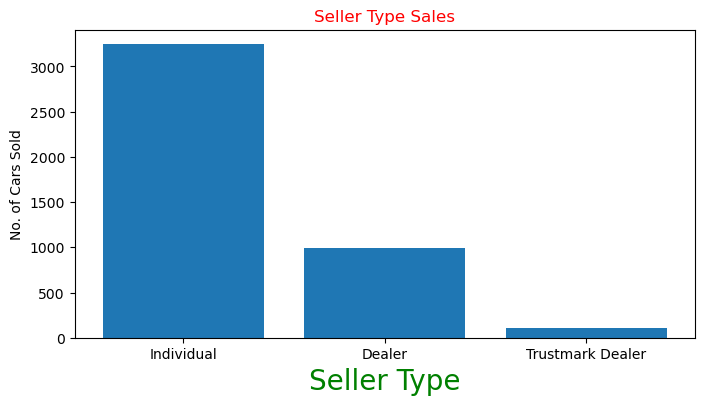

In [15]:
plt.figure(figsize=(8,4))
plt.bar(seller.index,seller.values)
plt.title("Seller Type Sales", color='red')
plt.xlabel("Seller Type",color='green',size=20)
plt.ylabel("No. of Cars Sold")
plt.show()

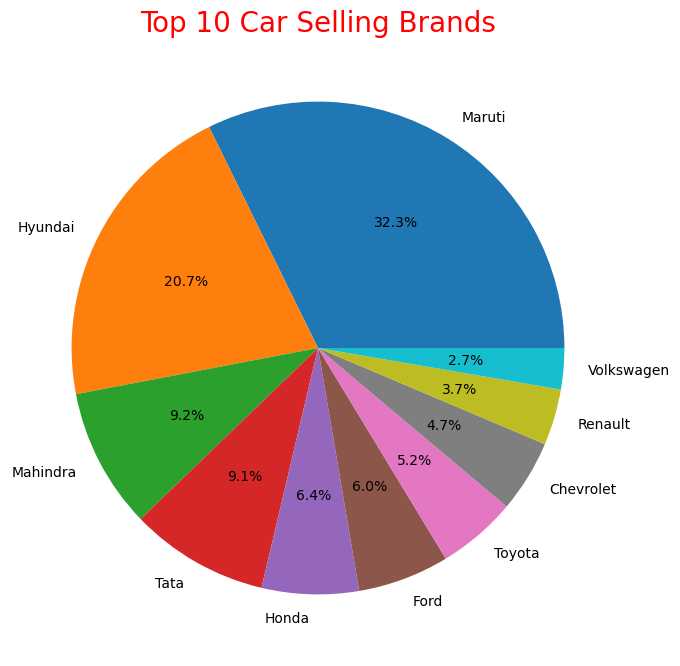

In [16]:
labels = df["brand"].value_counts().index[:10]
sizes = df["brand"].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('Top 10 Car Selling Brands',color = 'red',fontsize = 20)
plt.show()

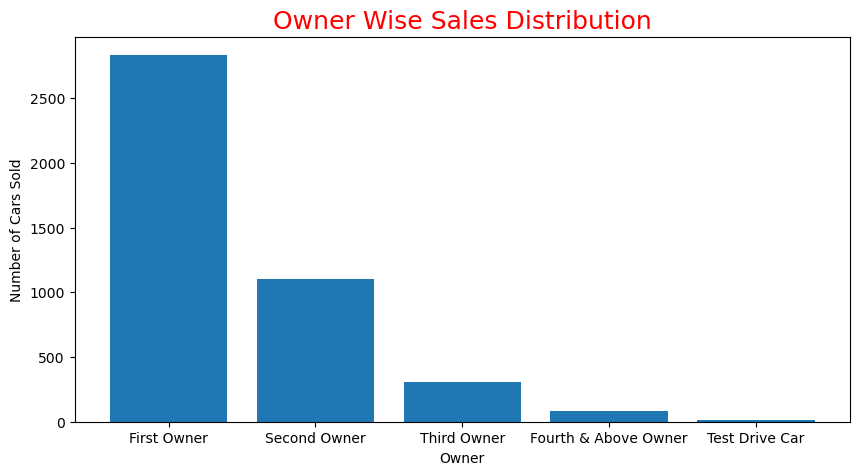

In [17]:
labels = df["owner"].value_counts()
sizes = df["owner"].value_counts().index
plt.figure(figsize = (10,5))
plt.bar(sizes, labels)
plt.title('Owner Wise Sales Distribution',color = 'red',fontsize = 18)
plt.xlabel('Owner')
plt.ylabel("Number of Cars Sold")
plt.show()

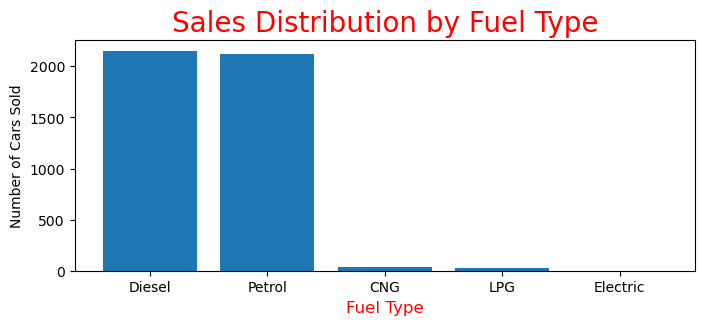

In [18]:
labels = df["fuel"].value_counts().values
sizes = df["fuel"].value_counts().index
plt.figure(figsize = (8,3))
plt.bar(sizes, labels)
plt.title('Sales Distribution by Fuel Type',color = 'red',fontsize = 20)
plt.xlabel('Fuel Type', fontsize= 12,color= 'red')
plt.ylabel("Number of Cars Sold")
plt.show()

In [19]:
price = df.groupby(['brand'])['selling_price'].mean().astype(int)
price.sort_values(ascending= True, inplace= True)
print(price)

brand
Daewoo             60000
OpelCorsa          88500
Ambassador        180000
Chevrolet         236727
Fiat              283432
Tata              284083
Datsun            297026
Maruti            342416
Force             346000
Renault           419376
Hyundai           419940
Nissan            449937
Volkswagen        471037
Skoda             490014
Honda             538146
Ford              571273
Mahindra          587709
Mitsubishi        840000
Toyota            924359
Kia              1300000
Isuzu            1500000
Jeep             1530000
MG               1842500
Audi             1931633
Jaguar           2069166
Volvo            2556250
Mercedes-Benz    2776657
BMW              2945384
Land             3609800
Name: selling_price, dtype: int32


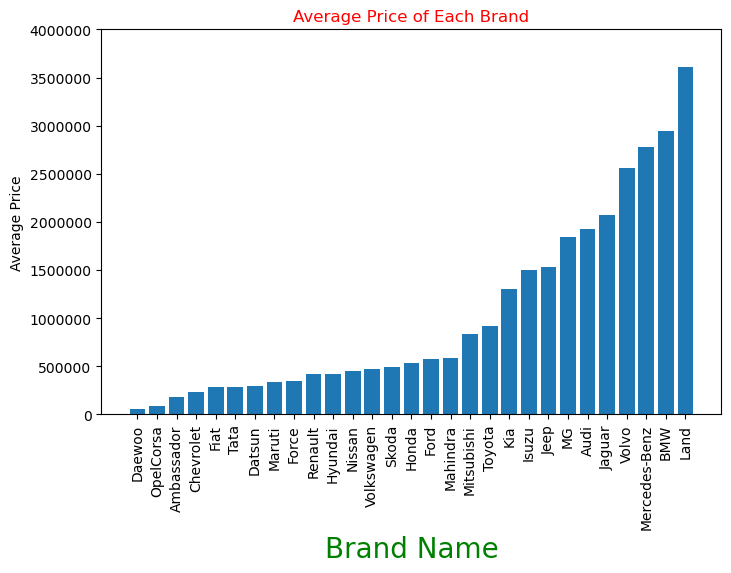

In [20]:
plt.figure(figsize=(8,5))
plt.bar(price.index,price.values)
plt.title("Average Price of Each Brand", color='red')
plt.xlabel("Brand Name",color='green',size=20)
plt.ylabel("Average Price")
plt.xticks(rotation= 90)
yticks = plt.yticks()[0]
plt.yticks(yticks, [int(y) for y in yticks])
plt.show()

In [21]:
price_owner = df.groupby(['owner'])['selling_price'].mean()
print(price_owner)

owner
First Owner             598636.969633
Fourth & Above Owner    173901.197531
Second Owner            343891.088608
Test Drive Car          954293.941176
Third Owner             269474.003289
Name: selling_price, dtype: float64


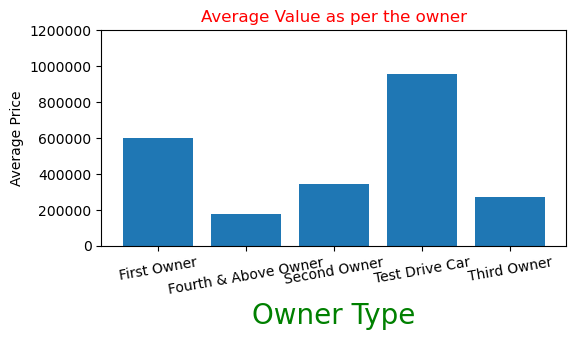

In [22]:
plt.figure(figsize=(6,2.8))
plt.bar(price_owner.index,price_owner.values)
plt.title("Average Value as per the owner", color='red')
plt.xlabel("Owner Type",color='green',size=20)
plt.ylabel("Average Price")
plt.xticks(rotation= 10)
yticks = plt.yticks()[0]
plt.yticks(yticks, [int(y) for y in yticks])
plt.show()

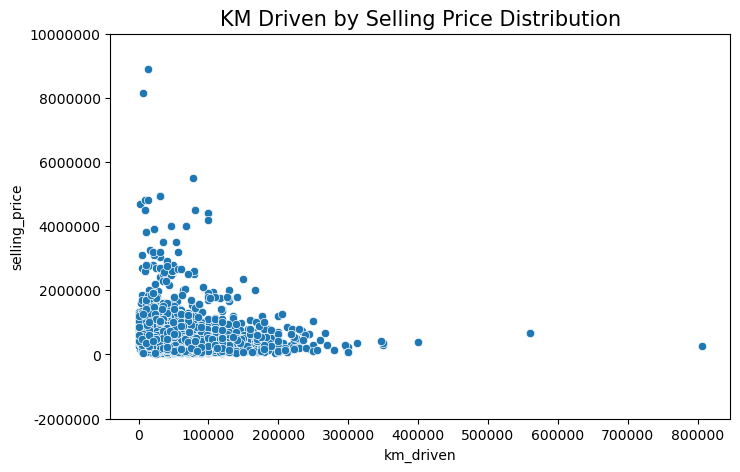

In [23]:
plt.figure(figsize=(8,5))
plt.title('KM Driven by Selling Price Distribution', fontsize=15)
sns.scatterplot(data=df, x='km_driven', y='selling_price')
yticks = plt.yticks()[0]
plt.yticks(yticks, [int(y) for y in yticks])
plt.show()

In [24]:
q= df['selling_price'].quantile(0.95)
df = df[df['selling_price']<q]

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb = LabelEncoder()
df['fuel'] = lb.fit_transform(df['fuel'])
df['seller_type']= lb.fit_transform(df['seller_type'])
df['transmission']= lb.fit_transform(df['transmission'])
df['owner']= lb.fit_transform(df['owner'])
df['brand']= lb.fit_transform(df['brand'])


In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,4,1,1,0,12
1,2007,135000,50000,4,1,1,0,12
2,2012,600000,100000,1,1,1,0,10
3,2017,250000,46000,4,1,1,0,5
4,2014,450000,141000,1,1,1,2,9


In [28]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4115, 7)
(4115,)


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state= 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3086, 7)
(1029, 7)
(3086,)
(1029,)


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
def reg_eval_metrics(y, ypred):
    mae= mean_absolute_error(y, ypred)
    mse= mean_squared_error(y, ypred)
    rmse = np.sqrt(mse)
    r2= r2_score(y, ypred)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse:',rmse)
    print('r2_score:',r2)

In [31]:
def mscore(model):
    print('Training Score:', model.score(x_train,y_train))  
    print('Testing Score:', model.score(x_test,y_test))
    
def reg_coef_inter(model):
    print("Model coefficient:", model.coef_)
    print("Model Intercept:", model.intercept_)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
print(x_train[:5])

[[ 1.2144273  -0.96411425 -1.02233039 -1.81773948  0.26535404 -0.6844467
  -0.70730134]
 [-1.39491184  0.30050899  0.96480687  0.42787463  0.26535404  2.50739693
   0.00368626]
 [ 0.97721465 -1.19404575  0.96480687  0.42787463  0.26535404 -0.6844467
   0.00368626]
 [-1.15769919  0.76037198  0.96480687  0.42787463  0.26535404  0.91147511
   0.00368626]
 [ 0.50278935  1.22023498  0.96480687  0.42787463  0.26535404  0.11351421
   0.00368626]]


In [35]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
## Checking the Linear Regression Model
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
mscore(LR)

Training Score: 0.4970375651348494
Testing Score: 0.46283746068825604


In [39]:
ypred_LR = LR.predict(x_test)

In [40]:
reg_eval_metrics(y_test,ypred_LR)

mae: 150350.75631581264
mse: 41173946473.534836
rmse: 202913.64289651604
r2_score: 0.46283746068825604


In [41]:
reg_coef_inter(LR)

Model coefficient: [132475.72312622 -23457.05528806 -82384.46896638  -2920.78847979
 -48798.19897549  -7406.03946176   -694.61920125]
Model Intercept: 395616.25696694554


In [42]:
## Checking the KNN Regression Model
KNN = KNeighborsRegressor(n_neighbors=30)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [43]:
mscore(KNN)

Training Score: 0.6055866886153606
Testing Score: 0.5713013790213692


In [44]:
ypred_KNN = KNN.predict(x_test)

In [45]:
reg_eval_metrics(y_test,ypred_KNN)

mae: 129481.00142533204
mse: 32860098725.552418
rmse: 181273.54667891402
r2_score: 0.5713013790213692


In [46]:
## Checking the Ridge Regression Model
RR = Ridge(alpha=5)
RR.fit(x_train,y_train)

Ridge(alpha=5)

In [47]:
mscore(RR)

Training Score: 0.4970365020743641
Testing Score: 0.46279348913998697


In [48]:
ypred_RR = RR.predict(x_test)

In [49]:
reg_eval_metrics(y_test,ypred_RR)

mae: 150333.22334417902
mse: 41177316928.550385
rmse: 202921.94787294543
r2_score: 0.46279348913998697


In [50]:
reg_coef_inter(RR)

Model coefficient: [132240.39830677 -23464.55233708 -82272.17854224  -2936.91458756
 -48725.40159438  -7485.59814219   -681.94004155]
Model Intercept: 395616.2569669456


In [51]:
## Checking the Lasso Regression Model
LAS= Lasso(alpha=0.1)
LAS.fit(x_train,y_train)

Lasso(alpha=0.1)

In [52]:
mscore(LAS)

Training Score: 0.49703756513398356
Testing Score: 0.4628374157478823


In [53]:
ypred_LAS = LAS.predict(x_test)

In [54]:
reg_eval_metrics(y_test,ypred_LAS)

mae: 150350.7531592712
mse: 41173949918.25111
rmse: 202913.6513846496
r2_score: 0.4628374157478823


In [55]:
reg_coef_inter(LAS)

Model coefficient: [132475.74280665 -23456.94312279 -82384.3101839   -2920.73506252
 -48798.1075976   -7405.97471566   -694.51424815]
Model Intercept: 395616.25696694554


In [56]:
## Checking the Decision Tree Regressor Model
DT = DecisionTreeRegressor(max_depth= 3, random_state=30)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=30)

In [57]:
mscore(DT)

Training Score: 0.5020524375127571
Testing Score: 0.4354525164148747


In [58]:
ypred_DT = DT.predict(x_test)

In [59]:
reg_eval_metrics(y_test,ypred_DT)

mae: 151857.83796094643
mse: 43273024773.257
rmse: 208021.69303526255
r2_score: 0.4354525164148747


In [60]:
# Checking by GradientBoostingRegressor
GBR = GradientBoostingRegressor(max_depth=8,n_estimators=1000,min_samples_leaf=30,random_state=40)
GBR.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=30, n_estimators=1000,
                          random_state=40)

In [61]:
mscore(GBR)

Training Score: 0.8704414661186246
Testing Score: 0.662914046006269


In [62]:
ypred_GBR = GBR.predict(x_test)

In [63]:
reg_eval_metrics(y_test,ypred_GBR)

mae: 108940.3244377931
mse: 25837913128.68057
rmse: 160741.75913147326
r2_score: 0.662914046006269


### By applying the different models on this dataset we come to the conclusion that Gadient Boosting Regressor Model is the best fit for this dataset as it has highest R2 Score and also a decent MAE score as compared to the other models.
### Hence, we would proceed with the Gradient Boosting Regressor Model.

In [64]:
import pickle

In [65]:
best_model = GBR
best_model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=30, n_estimators=1000,
                          random_state=40)

In [66]:
### Saving the Best Model;
with open('GBR_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [67]:
### Loading the Model;
with open('GBR_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [68]:
import random
df1 = df.sample(frac=1, random_state=40)
random_20 = df1.head(20)
new_df = pd.DataFrame(random_20)
new_df.to_csv('car_detail_20.csv', index=False)

In [69]:
new_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
2886,2012,260000,42000,4,0,1,0,8
1569,2011,290000,60000,1,1,1,2,21
2075,2014,220000,70000,4,1,1,0,3
54,2017,725000,18500,1,0,1,0,12
4233,2010,75000,100000,1,1,1,4,19


In [70]:
new_df.shape

(20, 8)

In [71]:
new_df1 = new_df.copy()

In [72]:
new_df.drop('selling_price',axis = 1, inplace= True)
new_df.shape

(20, 7)

In [73]:
new_df2 = new_df.copy()

In [74]:
sc = StandardScaler()
new_df = sc.fit_transform(new_df)

In [75]:
print(new_df)

[[ 0.0103038  -0.55337425  1.         -1.73205081  0.22941573 -0.72335628
  -0.67075489]
 [-0.19577228 -0.23443166 -1.          0.57735027  0.22941573  0.53465464
   2.05418686]
 [ 0.42245598 -0.05724133  1.          0.57735027  0.22941573 -0.72335628
  -1.71880941]
 [ 1.04068423 -0.96977151 -1.         -1.73205081  0.22941573 -0.72335628
   0.16768872]
 [-0.40184837  0.47432964 -1.          0.57735027  0.22941573  1.79266557
   1.63496505]
 [ 1.24676032 -0.43642863  1.         -1.73205081  0.22941573 -0.72335628
  -0.46114399]
 [-0.40184837 -0.41162199 -1.          0.57735027  0.22941573 -0.72335628
  -0.04192218]
 [-0.60792445  0.47432964 -1.          0.57735027  0.22941573  1.79266557
  -0.67075489]
 [-0.60792445  0.82871029 -1.          0.57735027  0.22941573  0.53465464
   0.16768872]
 [-1.4322288   0.11994899  1.          0.57735027  0.22941573  1.79266557
  -0.25153308]
 [ 0.0103038  -0.51793618  1.          0.57735027  0.22941573 -0.72335628
  -0.25153308]
 [ 0.0103038  -0.0572

In [76]:
new_df = pd.DataFrame(data=new_df, columns=new_df2.columns)
new_df.head()

,year,km_driven,fuel,seller_type,transmission,owner,brand
0,0.010304,-0.553374,1.0,-1.732051,0.229416,-0.723356,-0.670755
1,-0.195772,-0.234432,-1.0,0.577350,0.229416,0.534655,2.054187
2,0.422456,-0.057241,1.0,0.577350,0.229416,-0.723356,-1.718809
3,1.040684,-0.969772,-1.0,-1.732051,0.229416,-0.723356,0.167689
4,-0.401848,0.474330,-1.0,0.577350,0.229416,1.792666,1.634965


In [77]:
predictions = loaded_model.predict(new_df)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [78]:
new_df['Predicted_SP']= predictions
new_df

,year,km_driven,fuel,seller_type,transmission,owner,brand,Predicted_SP
0,0.010304,-0.553374,1.0,-1.732051,0.229416,-0.723356,-0.670755,368685.925768
1,-0.195772,-0.234432,-1.0,0.577350,0.229416,0.534655,2.054187,245356.602378
2,0.422456,-0.057241,1.0,0.577350,0.229416,-0.723356,-1.718809,253542.406564
3,1.040684,-0.969772,-1.0,-1.732051,0.229416,-0.723356,0.167689,669724.316608
4,-0.401848,0.474330,-1.0,0.577350,0.229416,1.792666,1.634965,147683.128853
5,1.246760,-0.436429,1.0,-1.732051,0.229416,-0.723356,-0.461144,589681.457559
6,-0.401848,-0.411622,-1.0,0.577350,0.229416,-0.723356,-0.041922,355511.924034
7,-0.607924,0.474330,-1.0,0.577350,0.229416,1.792666,-0.670755,298305.495337
8,-0.607924,0.828710,-1.0,0.577350,0.229416,0.534655,0.167689,414362.290640
9,-1.432229,0.119949,1.0,0.577350,0.229416,1.792666,-0.251533,187432.889920


### Comparing the Actual Price with Predicted Price

In [79]:
new_df1['Predicted_SP'] = predictions

In [80]:
new_df1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,Predicted_SP
2886,2012,260000,42000,4,0,1,0,8,368685.925768
1569,2011,290000,60000,1,1,1,2,21,245356.602378
2075,2014,220000,70000,4,1,1,0,3,253542.406564
54,2017,725000,18500,1,0,1,0,12,669724.316608
4233,2010,75000,100000,1,1,1,4,19,147683.128853
2329,2018,680000,48600,4,0,1,0,9,589681.457559
395,2010,400000,50000,1,1,1,0,11,355511.924034
3062,2009,130000,100000,1,1,1,4,8,298305.495337
3603,2009,270000,120000,1,1,1,2,12,414362.290640
2873,2005,140000,80000,4,1,1,4,10,187432.889920
